## 随机漫步

在前一步的基础上，上移或下移一步

In [10]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [11]:
# random.randint?

# Return random integer in range [a, b], including both end points.

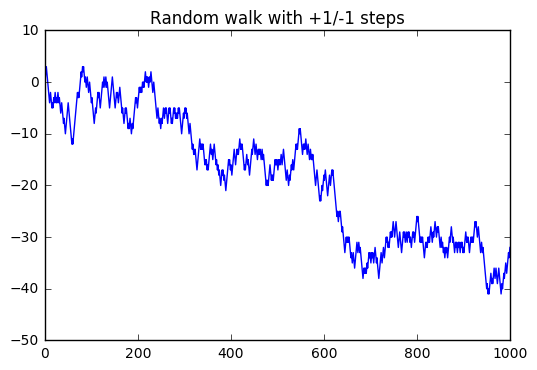

In [12]:
import matplotlib.pyplot as plt

plt.plot(walk)
plt.title('Random walk with +1/-1 steps')
plt.show()

## numpy 实现

In [5]:
import numpy as np

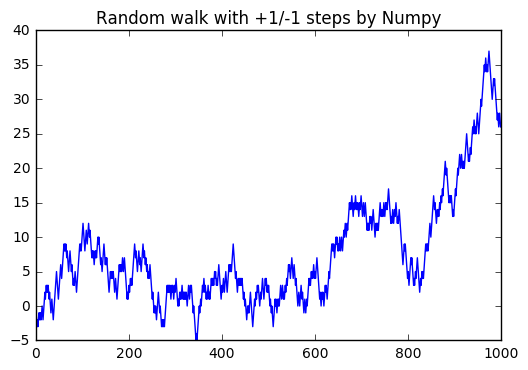

In [14]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

plt.plot(walk)
plt.title('Random walk with +1/-1 steps by Numpy')
plt.show()

#### 其它统计工作

最大值、最小值，漫步高度第一次高于10

In [15]:
walk.min()

-5

In [16]:
walk.max()

37

In [17]:
# argmax 返回布尔型数组的第一个最大值索引，True就是最大值
# 但是，这个函数的效率不高，它无论如何会遍历整个数组
(np.abs(walk) >= 10).argmax()

99

## 一次模拟多个随机漫步

In [18]:
nwalks = 5000
nsteps = 5000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(1) # 绝了！！！

walks

array([[ -1,   0,  -1, ..., -18, -17, -16],
       [  1,   0,  -1, ..., -30, -31, -32],
       [  1,   2,   1, ...,  64,  63,  64],
       ..., 
       [  1,   0,   1, ..., -52, -53, -52],
       [ -1,  -2,  -1, ...,  -8,  -9,  -8],
       [  1,   0,  -1, ...,  34,  35,  36]], dtype=int32)

In [19]:
walks.max()

289

In [20]:
walks.min()

-262

#### 统计30或-30的最小穿越时间

因为不是所有的漫步都达到30，使用any进行检查

In [25]:
hits30 = (np.abs(walks)>= 30).any(1)

hits30

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [26]:
hits30.sum()

4994

In [27]:
crossing_times = (np.abs(walks[hits30])>=30).argmax(1)

crossing_times.mean()

883.88506207448938

## 其它分布方式得到漫步数据

步子不统一，还可以是小数

In [ ]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, ns))